In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from statistics import stdev
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import tree 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
os.chdir("F:/Eddwisor/Task Program/Projects/Second Project Works")

In [3]:
os.getcwd()

'F:\\Eddwisor\\Task Program\\Projects\\Second Project Works'

In [4]:
df_data=pd.read_csv("day.csv",encoding = 'ISO-8859-1')

In [5]:
#Check Dimensions
df_data.shape                   #rows = 731 and columns = 16

(731, 16)

In [6]:
#Get Names of the Columns
col_names = pd.DataFrame(df_data.columns)
#col_names

In [7]:
df_data.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


In [8]:
# No need of instant for bike renting
#get the index of column instant and remove it from the dataset
instant_index = df_data.columns.get_loc("instant")
instant_index
df_data= df_data.drop(df_data.columns[instant_index],axis=1)

In [9]:
instant_index

0

In [10]:
df_data.info()
#Original dataset haave 4 float variables,10 int variables and 1 float vaiables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [11]:
num_data=df_data._get_numeric_data()
num_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [12]:
cat_data=df_data.select_dtypes(include=['object'])
cat_data.columns

Index(['dteday'], dtype='object')

In [13]:
#Now we have two subset of dataset
# 1. num_data which contains only numerical variables data
# 2. cat_data which contains only categorical variables data

In [14]:
df_data.shape    , num_data.shape  , cat_data.shape

((731, 15), (731, 14), (731, 1))

In [15]:
train, test = sklearn.model_selection.train_test_split(df_data, train_size = 0.7)

C:\Users\Jaggu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
train.shape ,test.shape          #train : rows = 511 & column =15 
                                 #test : rows = 220 & column =15

((511, 15), (220, 15))

# <b><i>Check For Missing Value Column Wise </b></i>

In [17]:
pd.isna(df_data).sum()

#No missing value is available on sample set

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# <b>Analyses</b>

In [18]:
# 1.How do the temperatures change across the seasons? What are the mean and median temperatures?

#First we converted the temperature, because the data of temperature was divided to 41. 
#Secondly we calculated the mean, the median and the standard deviation of all seasons.


In [19]:
# Converting the nomalized temperature:
x = df_data.iloc[:, [8]]                     #temp is a column here
df_data['raw.temp']= x * 41                  #raw.data is a new column here 
df_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,raw.temp
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237


In [20]:
#Calculating Median, Mean and Standard deviation of spring
rawtemp_col = df_data.iloc[:, [15]]                   #location of raw.data column
spring=rawtemp_col[df_data.season == 1]               
mean_sp = spring.mean()
median_sp = spring.median()
sd_sp=np.std(spring)


#Calculating Median, Mean and Standard deviation of summer.
rawtemp_col = df_data.iloc[:,[15]]
summer = rawtemp_col[df_data.season == 2]
mean_su = summer.mean()
median_su = summer.median()
sd_su = np.std(summer)


#Calculating Median, Mean and Standard deviation of fall.
rawtemp_col = df_data.iloc[:,[15]]
fall = rawtemp_col[df_data.season == 3]
mean_fa = fall.mean()
median_fa = fall.median()
sd_fa = np.std(fall)


#Calculating Median, Mean and Standard deviation of winter.
rawtemp_col = df_data.iloc[:,[15]]
winter = rawtemp_col[df_data.season == 4]
mean_wi = winter.mean()
median_wi = winter.median()
sd_wi = np.std(winter)

In [21]:
#Spring
mean_sp , median_sp , sd_sp

(raw.temp    12.20765
 dtype: float64, raw.temp    11.719153
 dtype: float64, raw.temp    4.200484
 dtype: float64)

In [22]:
#Summer
mean_su, median_su, sd_su

(raw.temp    22.320611
 dtype: float64, raw.temp    23.045423
 dtype: float64, raw.temp    5.014965
 dtype: float64)

In [23]:
#Fall
mean_fa ,median_fa,sd_fa

(raw.temp    28.958682
 dtype: float64, raw.temp    29.297903
 dtype: float64, raw.temp    2.897013
 dtype: float64)

In [24]:
#Winter
mean_wi,median_wi,sd_wi

(raw.temp    17.339148
 dtype: float64, raw.temp    16.775827
 dtype: float64, raw.temp    4.408743
 dtype: float64)

In [25]:
#Spring:
#The mean temperature of spring was 12.21.
#The median temperature of spring was 11.72.
#The standard deviation of the temperature in spring was 4.21.

#Summer:
#The mean temperature of summer was 22.32.
#The median temperature of summer was 23.05.
#The standard deviation of the temperature in summer was 5.03.

#Fall:
#The mean temperature of fall was 28.96.
#The median temperature of fall was 29.3.
#The standard deviation of the temperature in fall was 2.9.

#Winter:
#The mean temperature of winter was 17.34.
#The median temperature of winter was 16.78.
#The standard deviation of the temperature in winter was 4.42.

In [26]:
#Secondly we created a histogram displaying the temperatures of each season including lines for the mean and median temperatures

Text(0,0.5,'Number of Days')

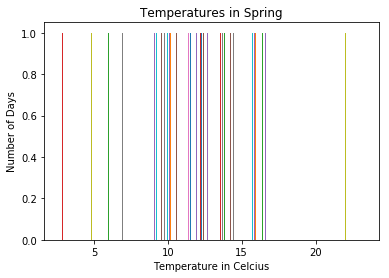

In [27]:
#create histogram for the distribution of temperatures in spring
  
plt.hist(x = spring ,  bins = 10,
        histtype = 'bar', rwidth = 0.8)
plt.title("Temperatures in Spring")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Number of Days") 

Text(0,0.5,'Number of Days')

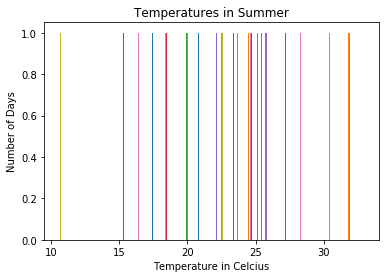

In [28]:
#create histogram for the distribution of temperatures in summer
  
plt.hist(x = summer ,  bins = 10,
        histtype = 'bar', rwidth = 0.8)
plt.title("Temperatures in Summer")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Number of Days") 

Text(0,0.5,'Number of Days')

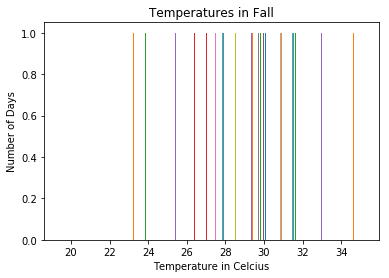

In [29]:
#create histogram for the distribution of temperatures in fall
  
plt.hist(x = fall ,  bins = 10,
        histtype = 'bar', rwidth = 0.8)
plt.title("Temperatures in Fall")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Number of Days") 

Text(0,0.5,'Number of Days')

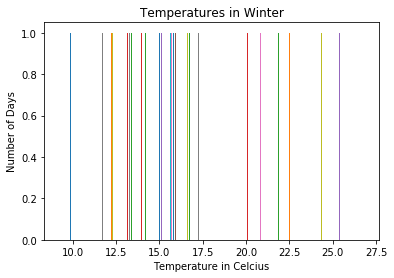

In [30]:
#create histogram for the distribution of temperatures in winter
  
plt.hist(x = winter ,  bins = 10,
        histtype = 'bar', rwidth = 0.8)
plt.title("Temperatures in Winter")
plt.xlabel("Temperature in Celcius")
plt.ylabel("Number of Days") 

In [31]:
#2. Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?

#First we checked the dataset of integers, NA or NULL and duplicates.
#Because the dataset was already recoded and correct we created a new coloumn. Afterwards we did a correlation test.

In [32]:
#Checking dataset 
#Tests if values in a vector are integers
df_data.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
raw.temp      float64
dtype: object

In [33]:
#Tests if values in a vector are NA or NULL
#pd.isna(df_data) we tested it but due to the huge output we deleted it. There was no "NA".

pd.isna(df_data).sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
raw.temp      0
dtype: int64

In [34]:
#Tests for duplicates
#There were no duplicates:df_data.duplicated() 

df_data.duplicated() 

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
701    False
702    False
703    False
704    False
705    False
706    False
707    False
708    False
709    False
710    False
711    False
712    False
713    False
714    False
715    False
716    False
717    False
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
728    False
729    False
730    False
Length: 731, dtype: bool

# <b>Creating a new Column</b>

In [35]:
#The Dataset is already recoded and correct.
#For this question we converted "atemp" because it was devided of 50.
y = df_data.iloc[:,[9]]
df_data['raw.atemp'] = y * 50
df_data.head()


#Create a new column of the mean of raw.temp and raw.atemp.
df_data['raw.mean.temp.atemp'] =(df_data['raw.temp'] + df_data['raw.atemp'])/2
df_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,raw.temp,raw.atemp,raw.mean.temp.atemp
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,16.146048
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,16.294774
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,8.760587
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,9.403050
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,10.384368


# <b>Correlation Test</b>

In [36]:
# Correlation between raw.temp and the total count of bike rentals.

corr_temp = df_data['raw.temp'].corr(df_data['cnt'])
corr_temp            #The Correlation was 0.63

#Temprature <- df_data['raw.temp']
#Amount.Rentals <- df_data['cnt']

0.627494009033492

In [37]:
#Correlation between atemp and the total count of bike rentals.

corr_atemp = df_data['raw.atemp'].corr(df_data['cnt'])
corr_atemp           #The Correlation was 0.63

#feeled temprature = df_data['raw.temp']
#annual rentals = df_data['cnt']

0.6310656998491813

In [38]:
#Correlation between mean.temp.atemp and the total count of bike rentals.

corr_mean_temp_atemp = df_data['raw.mean.temp.atemp'].corr(df_data['cnt'])
corr_mean_temp_atemp     #The Correlation was 0.63

#feeled raw temprature = df_data['mean.temp.atemp']
#annual rentals = df_data['cnt']

0.6306607337618542

# <b>Plotting the Correlations</b>

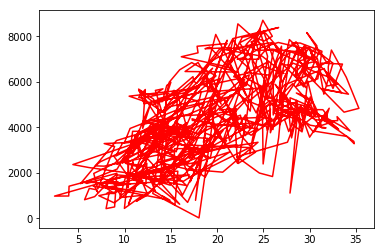

In [39]:
x= df_data['raw.temp']
y= df_data['cnt']
plt.plot(x,y,color="red")

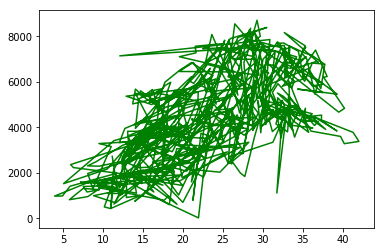

In [40]:
x=df_data['raw.atemp']
y=df_data['cnt']
plt.plot(x,y,color="green")

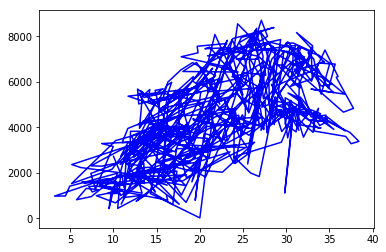

In [41]:
x=df_data['raw.mean.temp.atemp']
y=df_data['cnt']
plt.plot(x,y,color="blue")

In [42]:
#3.Is temperature associated with bike rentals (registered vs. casual)?

2.4243464

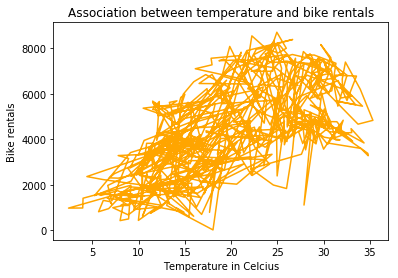

In [43]:
# Plotting the association:
x = df_data['raw.temp']
y = df_data['cnt']
plt.plot(x,y,color="orange")
plt.xlabel("Temperature in Celcius") 
plt.ylabel("Bike rentals")
type = "n"
plt.title("Association between temperature and bike rentals")


#Calculating min and max for the x-axis and y-axis:
min(df_data['raw.temp'])     #For raw.temp 

In [44]:
max(df_data['raw.temp'])

35.328347

In [45]:
min(df_data['casual']) , min(df_data['registered'])

(2, 20)

In [46]:
max(df_data['casual']) ,max(df_data['registered'])

(3410, 6946)

In [47]:
# Calculating the correlation between raw.temp and registered users and between raw.temp and causal users
corr_reg = df_data['raw.temp'].corr(df_data['registered'])
corr_reg

0.5400119661617864

In [48]:
corr_cas = df_data['raw.temp'].corr(df_data['casual'])
corr_cas

0.5432846616821874

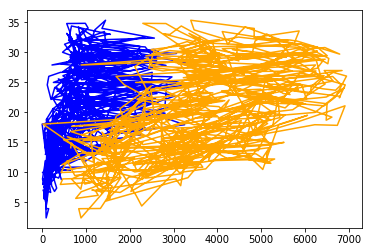

In [49]:
x = df_data['casual']
y = df_data['registered']
z = df_data['raw.temp']

plt.plot(x,z,color="blue")               #Blue represent the casual users
plt.plot(y,z,color="orange")             #Orange represent the registered users

In [50]:
# 4.Can the number of total bike rentals be predicted by holiday and weather?

In [51]:
lookup = {'numbers':["1","2","3","4"],
        'weather':["nice","cloudy", "wet", "lousy"]}
df=pd.DataFrame(lookup)

df_data['weather']= np.where(df_data['weathersit'] == 1,'nice','cloudy') 

In [52]:
df_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,raw.temp,raw.atemp,raw.mean.temp.atemp,weather
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,14.110847,18.18125,16.146048,cloudy
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,14.902598,17.68695,16.294774,cloudy
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,8.050924,9.47025,8.760587,nice
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,8.200000,10.60610,9.403050,nice
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,9.305237,11.46350,10.384368,nice


In [53]:
# 5. What are the mean temperature, humidity, windspeed and total rentals per months?

In [54]:
# Months is coded as 1 to 12
# Converting month with "merge"

lookup_month ={'mnth' :["1","2","3","4","5","6","7","8","9","10","11","12"],
                          'mnth.name':["01Jan", "02Feb", "03March", "04April", "05May", "06June", "07July", "08Aug", "09Sept", "10Oct", "11Nov", "12Dec"]}

df=pd.DataFrame(lookup_month)

df_data['mnth.name'] = np.where(df_data['mnth']==1,'01Jan','02Feb')


# Convert the nomalized windspeed and humidity
df_windspeed=df_data.iloc[:,[11]]
df_data['raw.windspeed']=df_windspeed * 67

df_hum = df_data.iloc[:,[10]]
df_data['raw.hum']= df_hum * 100

df_data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,casual,registered,cnt,raw.temp,raw.atemp,raw.mean.temp.atemp,weather,mnth.name,raw.windspeed,raw.hum
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,...,331,654,985,14.110847,18.181250,16.146048,cloudy,01Jan,10.749882,80.5833
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,...,131,670,801,14.902598,17.686950,16.294774,cloudy,01Jan,16.652113,69.6087
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,...,120,1229,1349,8.050924,9.470250,8.760587,nice,01Jan,16.636703,43.7273
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,...,108,1454,1562,8.200000,10.606100,9.403050,nice,01Jan,10.739832,59.0435
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,...,82,1518,1600,9.305237,11.463500,10.384368,nice,01Jan,12.522300,43.6957
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,...,88,1518,1606,8.378268,11.660450,10.019359,nice,01Jan,6.000868,51.8261
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,...,148,1362,1510,8.057402,10.441950,9.249676,cloudy,01Jan,11.304642,49.8696
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,...,68,891,959,6.765000,8.112700,7.438850,cloudy,01Jan,17.875868,53.5833
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,...,54,768,822,5.671653,5.808750,5.740201,nice,01Jan,24.250650,43.4167
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,...,41,1280,1321,6.184153,7.544400,6.864277,nice,01Jan,14.958889,48.2917


<BarContainer object of 731 artists>

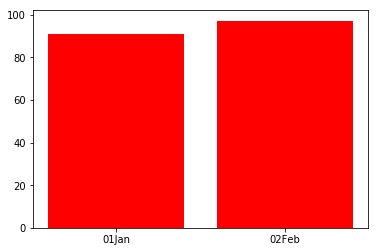

In [55]:
x = df_data['mnth.name']
z = df_data['raw.hum']

plt.bar(x,z,color="red")

<BarContainer object of 731 artists>

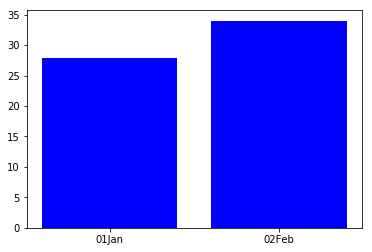

In [56]:
x = df_data['mnth.name']
y = df_data['raw.windspeed']

plt.bar(x,y,color="blue")

# Decision  Tree

In [57]:
#Convert String into int
import random
random.seed(1234)
df_data['dteday'],_ = pd.factorize(df_data['dteday'])
df_data['mnth.name'],_ = pd.factorize(df_data['mnth.name'])
df_data['weather'],_ = pd.factorize(df_data['weather'])

#Select the predictor feature and target variable
X = df_data.iloc[:,:-1]
y = df_data.iloc[:,-1]

#split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [58]:
#Create a Model for Decision Tree
deci_tree_model=tree.DecisionTreeRegressor(criterion="mse",min_samples_leaf=5).fit(X_train,y_train)
deci_tree_model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
#Prediction on test dataset
score = deci_tree_model.score(X_test, y_test)
print(score)

0.9771744010593412


In [60]:
#Compute and plot the RMSE
RMSE = np.sqrt(np.sum(((y_train-score)**2)/len(y_test)))
RMSE

95.6876455102273

In [61]:
#Because of large dataset,we cannot built a decision tree here.It contain messy data.
#Create Dot file to Visualize Tree                           #http://webgraphviz.com
dotfile=open("pt.dot","w")     
df=tree.export_graphviz(deci_tree_model,out_file=dotfile,feature_names = X.columns)

In [62]:
#Decision Tree:
#RMSE = 95.68%

# Random Forest

In [63]:
#Create a model for Random Forest
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)  
regressor.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
#Prediction on test dataset
y_pred = regressor.predict(X_test) 

In [65]:
#Calculate MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.3072896118181276
Mean Squared Error: 5.020130824934021
Root Mean Squared Error: 2.2405648450634095


In [66]:
#Random Forest :
#MAE : 0.30

# Linear Regression

In [67]:
#Linear Regression is apply on sample_set dataset.
#Create A model For Linear Regression
df_data['weather'],_ = pd.factorize(df_data['weather'])

In [68]:
linearReg = linear_model.LinearRegression().fit(X_train,y_train)
linearReg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
#To Make Predictions On Test Dataset
logit_predictions = linearReg.predict(X_test)
#logit_predictions

In [70]:
#Calculate Confusion Matrix for the model
CM = pd.crosstab(y_test,logit_predictions)
CM

col_0,-1.1516596336204508e-14,18.791699999999963,25.41669999999998,28.999999999999964,31.434799999999953,37.9167,38.130399999999916,39.62500000000001,40.00000000000006,40.0833,...,89.79170000000005,90.00000000000006,90.54169999999993,91.70830000000004,92.49999999999997,92.9167000000001,93.00000000000003,93.95650000000003,94.82609999999994,96.25
raw.hum,,,,,,,,,,,,,,,,,,,,,
0.0000,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18.7917,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25.4167,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29.0000,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31.4348,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37.9167,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38.1304,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39.6250,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0000,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#Once we get Confusion Matrix then we calculate the term accordingly.
TN = CM.iloc[0,0]             #True Negative : 1
FN = CM.iloc[1,0]             #False Negative : 0
TP = CM.iloc[1,1]             #True Positive : 1
FP = CM.iloc[0,1]             #False Positive : 0
TN,FN,TP,FP

(1, 0, 1, 0)

In [72]:
#Calculate The Accuracy for the model
((TP+TN)*100)/(TN+FN+TP+FP)      #Accuracy = 100%

100.0

In [73]:
#Calculate The False Negative Rate
(FN*100)/(FN+TP)                #FNR = 0.0%

0.0

In [74]:
#Logistic Regression :
#Accuracy = 100%
#FNR = 0.0%